In [21]:
import arff
import pandas as pd

# Load the ARFF file
data = arff.load(open('data/ACS Income by State.arff', 'r'))

# Convert the data to pandas DataFrame
df = pd.DataFrame(data['data'])
df.columns = data['attributes']

# Feature explanations can be found in the paper appendix starting on p. 18
# Features:
#     AGEP = Age --> ratio
#     COW = Class of worker --> nominal
#     SCHL = Educational attainment --> ordinal
#     MAR = Marital status --> Nominal
#     OCCP = Occupation --> Nominal
#     POBP = Place of birth --> Nominal
#     RELP = Relationship --> Nominal
#     WKHP = Usual hours worked per week past 12 months --> ratio until 99+
#     SEX = 1 male 2 female
#     RAC1P = Recoded detailed race code --> nominal
#     ST = State
# Targets:
#     PINCP = Total person's income
# 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df.columns = [col[0] for col in df.columns] # rename columns

In [27]:
df.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,ST,PINCP
0,18.0,1.0,18.0,5.0,4720.0,13.0,17.0,21.0,2.0,2.0,1.0,1600.0
1,53.0,5.0,17.0,5.0,3605.0,18.0,16.0,40.0,1.0,1.0,1.0,10000.0
2,41.0,1.0,16.0,5.0,7330.0,1.0,17.0,40.0,1.0,1.0,1.0,24000.0
3,18.0,6.0,18.0,5.0,2722.0,1.0,17.0,2.0,2.0,1.0,1.0,180.0
4,21.0,5.0,19.0,5.0,3870.0,12.0,17.0,50.0,1.0,1.0,1.0,29000.0


In [28]:
# Max: Explore the dataset, understand the features
# Find out which classes are underrepresented

race_counts = df["RAC1P"].value_counts()
print("Unique values and counts in race column:")
print(race_counts)
print("#############")

sex_counts = df["SEX"].value_counts()
print("Unique values and counts in sex column:")
print(sex_counts)
print("#############")

sex_counts = df["MAR"].value_counts()
print("Unique values and counts in martial status column:")
print(sex_counts)
print("#############")


Unique values and counts in race column:
RAC1P
1.0    1298126
2.0     147573
6.0      96399
8.0      62877
9.0      41815
3.0      11887
7.0       2813
5.0       2104
4.0        906
Name: count, dtype: int64
#############
Unique values and counts in sex column:
SEX
1.0    866735
2.0    797765
Name: count, dtype: int64
#############
Unique values and counts in martial status column:
MAR
1.0    908704
5.0    513951
3.0    178811
2.0     34582
4.0     28452
Name: count, dtype: int64
#############


In [45]:
# Calculate the counts for intersectional groups of 'RAC1P' and 'SEX'
intersectional_counts = df.groupby(['RAC1P', 'SEX']).size().reset_index(name='counts')
print("Unique values and counts for intersectional groups of 'RAC1P' and 'SEX':")
print(intersectional_counts)
print("#############")


Unique values and counts for intersectional groups of 'RAC1P' and 'SEX':
    RAC1P  SEX  counts
0     1.0  1.0  684213
1     1.0  2.0  613913
2     2.0  1.0   68752
3     2.0  2.0   78821
4     3.0  1.0    6026
5     3.0  2.0    5861
6     4.0  1.0     467
7     4.0  2.0     439
8     5.0  1.0    1107
9     5.0  2.0     997
10    6.0  1.0   48722
11    6.0  2.0   47677
12    7.0  1.0    1464
13    7.0  2.0    1349
14    8.0  1.0   34916
15    8.0  2.0   27961
16    9.0  1.0   21068
17    9.0  2.0   20747
#############


/var/folders/gg/6xrwygnd4xjfh4gztvfs1kn40000gn/T/ipykernel_67581/1782748177.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  intersectional_counts_age = df.groupby(['AGE_BIN', 'SEX']).size().unstack(fill_value=0)


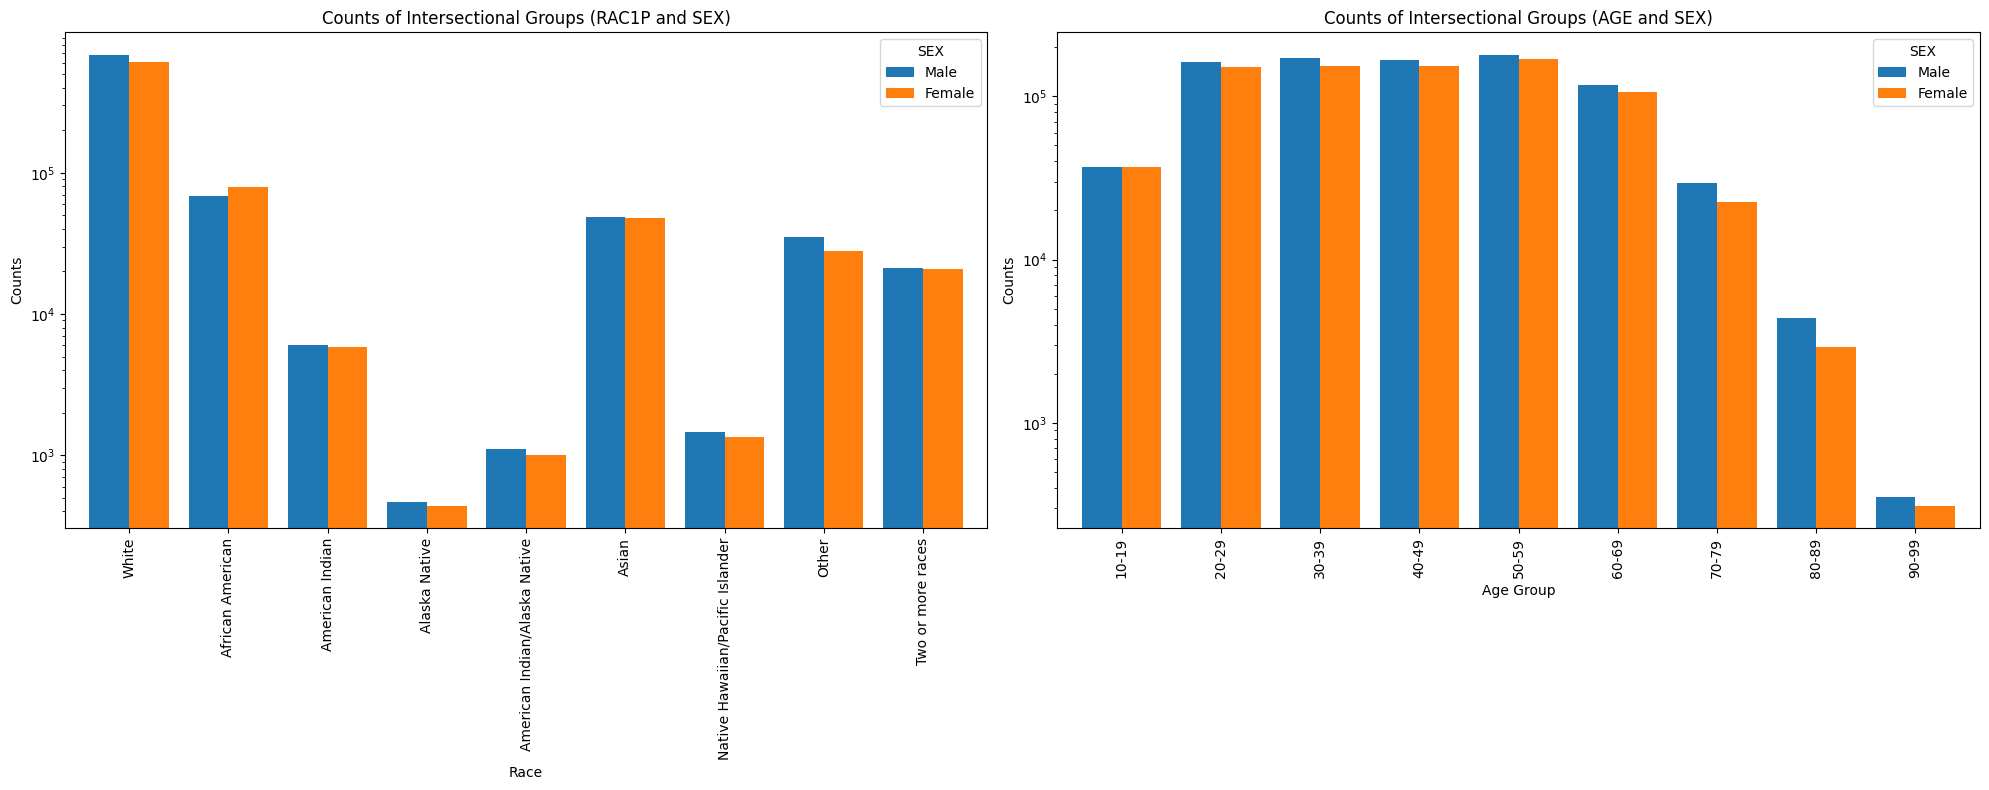

In [65]:
# Sample race_dict and sex_dict
race_dict = {1.0: "White", 2.0: "African American", 3.0: "American Indian", 4.0: "Alaska Native", 5.0: "American Indian/Alaska Native", 6.0: "Asian", 7.0: "Native Hawaiian/Pacific Islander", 8.0: "Other", 9.0: "Two or more races"}
sex_dict = {1.0: "Male", 2.0: "Female"}

# Calculate counts for intersectional groups of 'RAC1P' and 'SEX'
intersectional_counts_race = df.groupby(['RAC1P', 'SEX']).size().unstack(fill_value=0)

# Map the 'RAC1P' index to their labels using race_dict
intersectional_counts_race.index = intersectional_counts_race.index.map(race_dict)
intersectional_counts_race.columns = intersectional_counts_race.columns.map(sex_dict)

# Create age bins
bins = range(10, 110, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['AGE_BIN'] = pd.cut(df['AGEP'], bins=bins, labels=labels, right=False)

# Calculate the counts for intersectional groups of 'AGE_BIN' and 'SEX'
intersectional_counts_age = df.groupby(['AGE_BIN', 'SEX']).size().unstack(fill_value=0)

# Map the 'SEX' columns to their labels using sex_dict
intersectional_counts_age.columns = intersectional_counts_age.columns.map(sex_dict)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot grouped bar chart for 'RAC1P' and 'SEX'
intersectional_counts_race.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Counts of Intersectional Groups (RAC1P and SEX)')
axes[0].set_xlabel('Race')
axes[0].set_ylabel('Counts')
axes[0].set_yscale("log")
axes[0].legend(title='SEX')

# Plot grouped bar chart for 'AGE_BIN' and 'SEX'
intersectional_counts_age.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Counts of Intersectional Groups (AGE and SEX)')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Counts')
axes[1].set_yscale("log")
axes[1].legend(title='SEX')
plt.tight_layout()
#plt.savefig("graphs/intersectional_bar_plots.png")

plt.show()


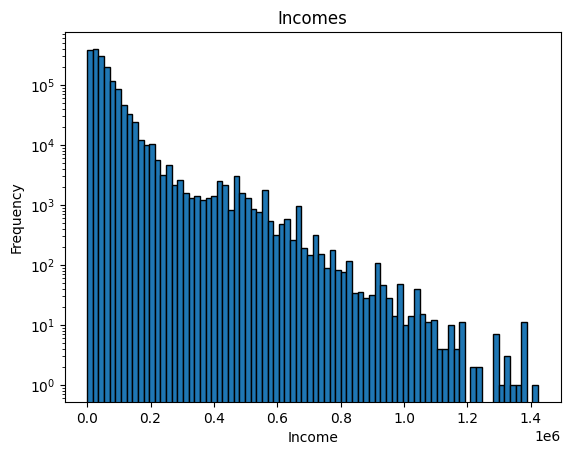

In [68]:
plt.hist(df['PINCP'], bins=80, edgecolor='black')
plt.title('Incomes')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.yscale("log")
#plt.savefig("graphs/income_distribution_hist.png")

# Show the plot
plt.show()

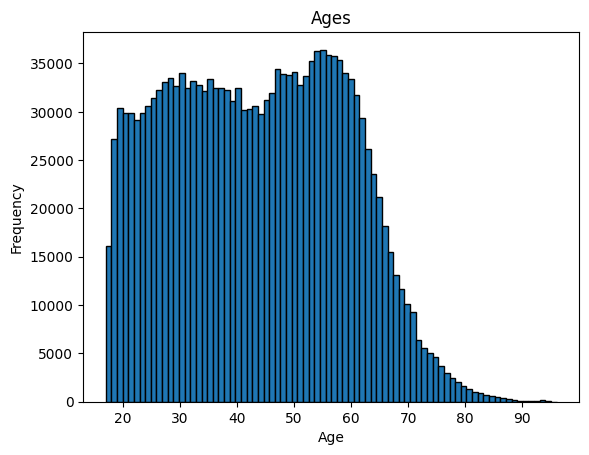

In [66]:
plt.hist(df['AGEP'], bins=80, edgecolor='black')
plt.title('Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.yscale("log")
#plt.savefig("graphs/age_distribution_hist.png")

# Show the plot
plt.show()